# Load Modules

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

## load data function

In [2]:
def load_data(file_pairs,src_dir='',dst_dir='.'):
    import os
    if not os.path.isdir(dst_dir):
        os.mkdir(dst_dir)
    for file_pair in file_pairs:
        src = os.path.abspath(os.path.expanduser(os.path.join(src_dir,file_pair[0])))
        dst = os.path.expanduser(os.path.join(dst_dir,file_pair[1]))
        if os.path.isfile(dst):
            os.remove(dst)
        if not os.path.islink(dst):
            os.symlink(src,dst)

def load_data_suffixes(file_pairs, src_dir='', dst_dir='.', suffixes=None):
    import os
    if not os.path.isdir(dst_dir):
        os.mkdir(dst_dir)
    if not suffixes:
        for file_pair in file_pairs:
            src = os.path.abspath(os.path.expanduser(os.path.join(src_dir, file_pair[0])))
            dst = os.path.expanduser(os.path.join(dst_dir, file_pair[1]))
            if os.path.isfile(dst):
                os.remove(dst)
            if not os.path.islink(dst):
                os.symlink(src, dst)
    else:
        for file_pair in file_pairs:
            for suffix_pair in suffixes:
                src = os.path.abspath(os.path.expanduser(
                    os.path.join(src_dir, file_pair[0] + suffix_pair[0])))
                dst = os.path.expanduser(
                    os.path.join(dst_dir, file_pair[1] + suffix_pair[1]))
                if os.path.isfile(dst):
                    os.remove(dst)
                if not os.path.islink(dst):
                    os.symlink(src, dst)

## venn2 function

In [3]:
def peak_overlap_venn2(peak1,
                       peak2,
                       label1='A',
                       label2='B',
                       col1='C1',
                       col2='C2',
                       col12='C12',
                       label_ha='center',
                       output_file=None):
    import subprocess
    from matplotlib_venn import venn2
    from matplotlib_venn._common import mix_colors
    from matplotlib.colors import ColorConverter
    a = int(
        subprocess.check_output(
            f'wc -l {peak1}'.split()).decode().strip().split()[0])
    b = int(
        subprocess.check_output(
            f'wc -l {peak2}'.split()).decode().strip().split()[0])
    ab = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak1} -b {peak2} | wc -l',
            shell=True).decode().strip())
    ba = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak2} -b {peak1} | wc -l',
            shell=True).decode().strip())
    intersect = (ab + ba) >> 1
    v = venn2((a - intersect, b - intersect, intersect),
              set_colors=(col1, col2),
              alpha=.5,
              set_labels=(label1, label2))
    v.get_label_by_id('10').set_text(f'{a-intersect:,}\n')
    v.get_label_by_id('01').set_text(f'\n{b-intersect:,}')
    v.get_label_by_id('11').set_text(f'{intersect:,}')
    v.get_patch_by_id('11').set_color(col12)
    v.get_patch_by_id('11').set_edgecolor('none')
    v.get_patch_by_id('11').set_alpha(0.4)
    
    if label_ha != 'auto' :
        for label in v.set_labels:
            label.set_ha(label_ha)
            
    if output_file:
        plt.savefig(output_file, transparent=True)
        plt.close()

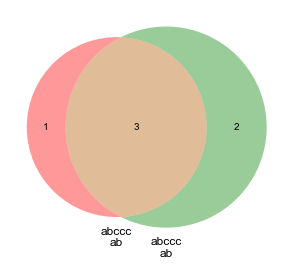

In [34]:
from matplotlib_venn import venn2
fig, ax = plt.subplots(figsize=(5,5))
v = venn2((1,2,3), set_labels=('abccc\nab', 'abccc\nab'), ax = ax)
# print(v)
# dir(v)
for label in v.set_labels:
#     print(dir(label))
    label.set_ha('center')

## venn3 function

In [271]:
def peak_overlap_venn3(peak1,
                       peak2,
                       peak3,
                       label1='A',
                       label2='B',
                       label3='C',
                       title='Title',
                       col1='C1',
                       col2='C2',
                       col3='C3',
                       output_file=None):
    import subprocess
    from matplotlib_venn import venn3
    from matplotlib_venn._common import mix_colors
    from matplotlib.colors import ColorConverter
    a = int(
        subprocess.check_output(
            f'wc -l {peak1}'.split()).decode().strip().split()[0])
    b = int(
        subprocess.check_output(
            f'wc -l {peak2}'.split()).decode().strip().split()[0])
    c = int(
        subprocess.check_output(
            f'wc -l {peak3}'.split()).decode().strip().split()[0])
    ab = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak1} -b {peak2} | wc -l',
            shell=True).decode().strip())
    ba = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak2} -b {peak1} | wc -l',
            shell=True).decode().strip())
    ac = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak1} -b {peak3} | wc -l',
            shell=True).decode().strip())
    ca = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak3} -b {peak1} | wc -l',
            shell=True).decode().strip())
    bc = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak2} -b {peak3} | wc -l',
            shell=True).decode().strip())
    cb = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak3} -b {peak2} | wc -l',
            shell=True).decode().strip())
    abc = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak1} -b {peak2} | intersectBed -u -a - -b {peak3} | wc -l',
            shell=True).decode().strip())
    bca = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak2} -b {peak3} | intersectBed -u -a - -b {peak1} | wc -l',
            shell=True).decode().strip())
    cab = int(
        subprocess.check_output(
            f'intersectBed -u -a {peak3} -b {peak1} | intersectBed -u -a - -b {peak2} | wc -l',
            shell=True).decode().strip())
    intersect_ab = (ab + ba) >> 1
    intersect_ac = (ac + ca) >> 1
    intersect_cb = (cb + bc) >> 1
    intersect_abc = (abc + bca + cab) // 3
    print(a - intersect_ab - intersect_ac + intersect_abc,
          b - intersect_ab - intersect_cb + intersect_abc,
          intersect_ab - intersect_abc,
          c - intersect_ac - intersect_cb + intersect_abc,
          intersect_ac - intersect_abc, intersect_cb - intersect_abc,
          intersect_abc)
    v = venn3(
        (a - intersect_ab - intersect_ac + intersect_abc, b - intersect_ab -
         intersect_cb + intersect_abc, intersect_ab - intersect_abc,
         c - intersect_ac - intersect_cb + intersect_abc, intersect_ac -
         intersect_abc, intersect_cb - intersect_abc, intersect_abc),
        set_colors=(col1, col2, col3),
        alpha=.5,
        set_labels=(label1, label2, label3))
    #if a - intersect_ab - intersect_ac + intersect_abc > 0:
    #    v.get_label_by_id('100').set_text(
    #        f'{a - intersect_ab - intersect_ac + intersect_abc:,}')
    #if b - intersect_ab - intersect_cb + intersect_abc > 0:
    #    v.get_label_by_id('010').set_text(
    #        f'{b - intersect_ab - intersect_cb + intersect_abc:,}')
    #if intersect_ab - intersect_abc > 0:
    #    v.get_label_by_id('110').set_text(f'{intersect_ab - intersect_abc:,}')
    #if c - intersect_ac - intersect_cb + intersect_abc > 0:
    #    v.get_label_by_id('001').set_text(
    #        f'{c - intersect_ac - intersect_cb + intersect_abc:,}')
    #if intersect_ac - intersect_abc > 0:
    #    v.get_label_by_id('101').set_text(f'{intersect_ac - intersect_abc:,}')
    #if intersect_cb - intersect_abc > 0:
    #    v.get_label_by_id('011').set_text(f'{intersect_cb - intersect_abc:,}')
    #if intersect_abc > 0:
    #    v.get_label_by_id('111').set_text(f'{intersect_abc:,}')
    if output_file:
        plt.title(title)
        plt.savefig(output_file, transparent=True)
        plt.close()

# 256 v.s. 1k v.s. dome

## venn -- Fig.4B

In [274]:
import os
os.chdir('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/sampling_down')
peak_overlap_venn3(
    'Nanog_256_excludeIgG_filtered_peaks.narrowPeak',
    'Nanog_1k_excludeIgG_filtered_peaks.narrowPeak',
    'Nanog_dome_excludeIgG_filtered_peaks.narrowPeak',
    label1='256-cell',
    label2='1k-cell',
    label3='dome',
    title = 'Nanog',
    col1='#6F7B88',
    col2='#8DA58E',
    col3='#92B2CB',
    output_file='/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Fig4B_Venn3_reduceInput_Nanog.pdf')

210 1170 370 11214 116 2552 1592


# dome 20E v.s. 50E

## venn -- Fig.S5A

In [4]:
os.chdir('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/sampling_down')
peak_overlap_venn2('Nanog_dome_excludeIgG_filtered_peaks.narrowPeak',
                   'Nanog_dome_20E_excludeIgG_filtered_peaks.narrowPeak',
                   label1='50 embryos',
                   label2='20 embryos',
                   col1='#98BDD8',
                   col2='#E4DDC3',
                   col12='#8BB38D',
                   label_ha='auto',
                   output_file='/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Supple_Fig5A_Venn3_50E_20E_Nanog.pdf')

## scatter plot -- Fig.S5B

In [9]:
bw_scan = True
os.chdir('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/TF/sampling_down')

import subprocess

def get_bigwig_mean(bigwig_file):
    import subprocess
    fold = subprocess.check_output(f'bigWigInfo {bigwig_file} | grep mean',
                                   shell=True).decode()
    fold = float(fold.split()[1])
    return fold

name = 'danRer11_2_promoter'
capture_regions_file = '~/source/bySpecies/danRer11_2/ensGene/danRer11_2.ensGene.promoter.bed'
bigwig_files = [
    'before_filter/Nanog_dome_20E.bw', '../comparison/bigWig/Nanog_dome.bw'
]
labels = ['Nanog_dome_20E', 'Nanog_dome']
cmd = f'''cut -f 1-3 {capture_regions_file} | awk '{{print $1"\\t"$2"\\t"$3"\\tP"NR}}' > captures_regions.bed'''
subprocess.call(cmd, shell=True)
for label, bigwig_file in zip(labels, bigwig_files):
    bw_scan_cmd = f'bigWigAverageOverBed {bigwig_file} captures_regions.bed {name}_{label}_signal.tsv'
    if bw_scan:
        print(subprocess.check_output(bw_scan_cmd.split()).decode(), end='')
capture_regions = pd.read_csv('captures_regions.bed', sep='\t', header=None)
capture_signal = pd.DataFrame(index=capture_regions[3].to_list())
for label, bigwig_file in zip(labels, bigwig_files):
    avg = get_bigwig_mean(bigwig_file)
    capture_signal[label] = pd.read_csv(
        f'{name}_{label}_signal.tsv',
        sep='\t',
        header=None,
        index_col=0,
        names=['size', 'covered', 'sum', 'mean0', 'mean'])['mean0'] / avg
capture_signal.head()

,Nanog_dome_20E,Nanog_dome
P1,2.619116,2.069805
P2,1.003375,0.607529
P3,1.951815,1.475200
P4,2.686978,2.136050
P5,2.619116,2.136050


In [10]:
capture_signal = capture_signal.dropna()

In [13]:
capture_signal = capture_signal.sort_values(['Nanog_dome_20E', 'Nanog_dome']).head(57622) ##### bottom 99%

In [14]:
capture_signal.corr()

,Nanog_dome_20E,Nanog_dome
Nanog_dome_20E,1.000000,0.946066
Nanog_dome,0.946066,1.000000


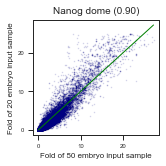

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import copy

regr = LinearRegression()

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 10,
                             'axes.labelsize': 8,
                             'xtick.labelsize': 6,
                             'ytick.labelsize': 6,
                             'legend.fontsize': 6
                         }):
    fig, ax = plt.subplots(figsize=(4.8 * .5, 4.8 * .5))
    sns.scatterplot(
        capture_signal['Nanog_dome'],
        capture_signal['Nanog_dome_20E'],
        s=1,
        color='navy',
        alpha=.1,
        edgecolor=None,
    )    
    regr.fit(capture_signal['Nanog_dome'].values.reshape(-1,1),capture_signal['Nanog_dome'].values.reshape(-1,1))
    test = copy.deepcopy(capture_signal['Nanog_dome'].values.reshape(-1,1))
    test.sort(axis=0)
    predict = regr.predict(test)
    ax.plot(test,predict,lw=1,color='g')
    X = capture_signal['Nanog_dome']
    y = capture_signal['Nanog_dome_20E']
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    ax.set_xlabel('Fold of 50 embryo input sample')
    ax.set_ylabel('Fold of 20 embryo input sample')
    ax.set_title(f"Nanog dome ({est2.rsquared:.2f})")
#     ax.set_xlim(-40/20,40)
#     ax.set_ylim(-40/20,40)
    fig.tight_layout()
    fig.savefig('/mnt/Storage/home/wangyiman/fitCUTRUN/revision_1/analysis/figures/Supple_Fig5B_scatter_promoterCorr_50E_20E_Nanog.pdf', transparent=True)
